In [22]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
# Enable LaTeX for text rendering
rc('text', usetex=True)
rc('text.latex', preamble="\\usepackage{siunitx}")

In [23]:
initial_heights = np.array([
0.804, 0.807, 0.8, 0.8, 0.801, 0.673, 0.804, 0.804, 0.807, 0.415, 0.804
])

final_heights = np.array([
1.9566144, 2.0401767, 1.97192, 2.12552, 2.2072356, 1.72288, 2.1624384, 2.1361476, 2.0918247, 1.1026135, 1.93161
])

separation_distances = np.array([
19, 14, 6, 29, 53, 18, 36, 39, 27, 25, 5
]) / 1000

height_ratios = final_heights / initial_heights

In [24]:
g = 9.81

approach_velocities = np.sqrt(2 * g * initial_heights)

separation_velocities = np.sqrt(2 * g * final_heights)

velocity_ratios = separation_velocities / approach_velocities

In [25]:
x = separation_distances
y_vel = velocity_ratios
y_height = height_ratios

In [26]:
yerr = 0.003
height_error = (yerr / final_heights + yerr / initial_heights) * height_ratios
# vel_error = (yerr / separation_velocities + yerr / approach_velocities) * velocity_ratios
vel_error = (((yerr/(2*final_heights)) * separation_velocities) + ((yerr/(2*initial_heights)) * approach_velocities)) * velocity_ratios

<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Aarya\AppData\Local\Temp\ipykernel_21116\2297043693.py:24: SyntaxWarning: invalid escape sequence '\D'
  plt.errorbar(x_list, y_list, fmt = '+', xerr = xerror, yerr = y_error_bars, color = scatter_colour, label = f'{input_label} = {round(slope, 3)}$\Delta h$ + {round(intercept, 3)}')


y = 1.6804x + 1.573
y = 5.4624x + 2.472


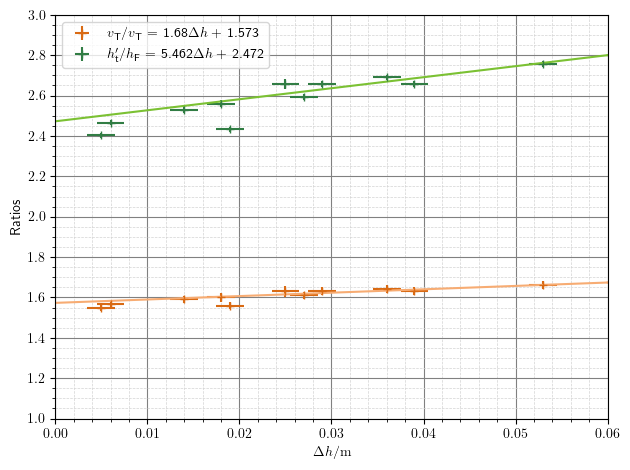

In [33]:
xlims = (0, 0.06)
ylims = (1.0, 3.0)

vel_colours = ('#d96a13', '#f7ac73')
height_colours = ('#317d44', '#7bc133')

def plot_graph(x_list, y_list, colour_vector, input_label, y_error_bars):
    scatter_colour, trend_colour = colour_vector[0], colour_vector[1]

    # Filter out anomalous point at separation = 0.019 m
    x_filtered = x[(x != 0.005) & (x != 0.006) & (x != 0.019)]
    y_filtered = y_list[(x != 0.005) & (x != 0.006) & (x != 0.019)]

    coefficients = np.polyfit(x_filtered, y_filtered, 1)
    slope, intercept = coefficients
    print(f'y = {round(slope, 4)}x + {round(intercept, 3)}')

    # Generate trendline values
    trendline_x = np.linspace(xlims, 100)
    trendline_y = slope * trendline_x + intercept

    xerror = 0.0015

    plt.errorbar(x_list, y_list, fmt = '+', xerr = xerror, yerr = y_error_bars, color = scatter_colour, label = f'{input_label} = {round(slope, 3)}$\Delta h$ + {round(intercept, 3)}')
    plt.plot(trendline_x, trendline_y, color = trend_colour)

plot_graph(x, y_vel, vel_colours, r"$v_{\text{T}} / v_{\text{T}}$", vel_error)
plot_graph(x, y_height, height_colours, r"$h_{\text{T}}' / h_{\text{F}}$", height_error)

plt.legend()
plt.xlim(xlims)
plt.ylim(ylims)

plt.xlabel(r'$\Delta h / \si{\metre}$')
plt.ylabel('Ratios')

x_tick_positions = np.arange(xlims[0], xlims[1] + 0.01, 0.01)  # From 0.65 to 1.1 with step 0.05
plt.xticks(x_tick_positions)

y_tick_positions = np.arange(ylims[0], ylims[1] + 0.01, 0.2)  # From 0.5 to 0.85 with step 0.05
plt.yticks(y_tick_positions)

# Add gridlines
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.8)  # Major gridlines
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)  # Minor gridlines

plt.tight_layout()

plt.savefig(r"C:\Coding\practical-project-25\graphs\with_separation/combined-ratios.png", dpi = 600)

plt.show()